# EDA and Preprocessing

## Importing dependencies & Importing the extracted data

In [1]:
#importing dependencies
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd

#reading the scraped data into a pandas dataframe
posts=pd.read_csv("../Data/scrapedData.csv")
posts.shape

(2600, 11)

In [2]:
posts.info() #seeing what all attributes does the posts contain

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   author          2600 non-null   object 
 1   body            1067 non-null   object 
 2   comments        2464 non-null   object 
 3   commentsNumber  2600 non-null   int64  
 4   created         2600 non-null   float64
 5   flair           2600 non-null   object 
 6   upvotes         2600 non-null   int64  
 7   submission      2600 non-null   object 
 8   time            2600 non-null   float64
 9   title           2600 non-null   object 
 10  url             2600 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 223.6+ KB


In [3]:
posts.head() #glimpse of how the data looks

,author,body,comments,commentsNumber,created,flair,upvotes,submission,time,title,url
0,frthnker,"(Will continue the AMA tomorrow, around 12 pm ...",How does one join your team full-time and par...,308,1.578083e+09,AMA,1069,ejes3k,1.578055e+09,"Hi Reddit, I am Pratik Sinha, Co-founder of Al...",https://www.reddit.com/r/india/comments/ejes3k...
1,pythoroshan,NaN,Please remember that top level comments are r...,411,1.584484e+09,AMA,819,fk649f,1.584455e+09,"Hi, I’m Dr. Roshan Radhakrishnan, a doctor, an...",https://i.redd.it/vf1ak8axs8n41.jpg
2,pankajpushkar,Hello Reddit!\n\nI'm Pankaj Pushkar. I represe...,"Verified!\n\nNote: This was an unplanned AMA,...",431,1.575239e+09,AMA,1567,e4i3vq,1.575211e+09,I Am An Aam Aadmi Party MLA. Ask Me Anything!,https://www.reddit.com/r/india/comments/e4i3vq...
3,aatishtaseer,[[Taking a break for a shower/hair cut. Will c...,Hi Aatish\n\nYour mother has endorsed RSS an...,147,1.577491e+09,AMA,260,egctcf,1.577462e+09,"Hi Reddit, I'm Aatish Taseer, Ask Me Anything",https://www.reddit.com/r/india/comments/egctcf...
4,Vaitheek,Hi Reddit! My name is **K Vaitheeswaran**. I a...,This AMA is verified: https://mobile.twitter....,44,1.579982e+09,AMA,57,etpyiu,1.579954e+09,"AMA - K Vaitheeswaran - Jan 25th, 2020",https://www.reddit.com/r/india/comments/etpyiu...


In [4]:
posts.describe() #exploring the statistical data of the posts

,commentsNumber,created,upvotes,time
count,2600.000000,2.600000e+03,2600.000000,2.600000e+03
mean,185.361154,1.575190e+09,385.466538,1.575162e+09
std,550.098086,2.830384e+07,935.245093,2.830384e+07
min,0.000000,1.389045e+09,0.000000,1.389016e+09
25%,11.000000,1.578660e+09,23.000000,1.578632e+09
50%,38.000000,1.584535e+09,94.000000,1.584506e+09
75%,114.000000,1.586637e+09,310.250000,1.586608e+09
max,10799.000000,1.587690e+09,17897.000000,1.587661e+09


In [5]:
def mkstring(text):
    return str(text)
posts['title']=posts['title'].apply(mkstring) #converting the title of the posts to string type
posts.describe()

,commentsNumber,created,upvotes,time
count,2600.000000,2.600000e+03,2600.000000,2.600000e+03
mean,185.361154,1.575190e+09,385.466538,1.575162e+09
std,550.098086,2.830384e+07,935.245093,2.830384e+07
min,0.000000,1.389045e+09,0.000000,1.389016e+09
25%,11.000000,1.578660e+09,23.000000,1.578632e+09
50%,38.000000,1.584535e+09,94.000000,1.584506e+09
75%,114.000000,1.586637e+09,310.250000,1.586608e+09
max,10799.000000,1.587690e+09,17897.000000,1.587661e+09


In [6]:
posts.corr() #seeing the correlation

,commentsNumber,created,upvotes,time
commentsNumber,1.000000,-0.048865,0.144416,-0.048865
created,-0.048865,1.000000,0.024587,1.000000
upvotes,0.144416,0.024587,1.000000,0.024587
time,-0.048865,1.000000,0.024587,1.000000


In [7]:
posts=posts.drop_duplicates() #dropping duplicates

In [8]:
posts.shape #seeing if anything dropped

(2600, 11)

In [9]:
posts.count() #seeing how many posts have non-null attribute values

author            2600
body              1067
comments          2464
commentsNumber    2600
created           2600
flair             2600
upvotes           2600
submission        2600
time              2600
title             2600
url               2600
dtype: int64

In [10]:
posts.isnull().sum() #number of null values attribute-wise

author               0
body              1533
comments           136
commentsNumber       0
created              0
flair                0
upvotes              0
submission           0
time                 0
title                0
url                  0
dtype: int64

In [11]:
#retaining only the posts having all attribute values as non-null
post_dropNull=posts.dropna()
post_dropNull.count()

author            1054
body              1054
comments          1054
commentsNumber    1054
created           1054
flair             1054
upvotes           1054
submission        1054
time              1054
title             1054
url               1054
dtype: int64

## Plotting the distribution of posts among flairs

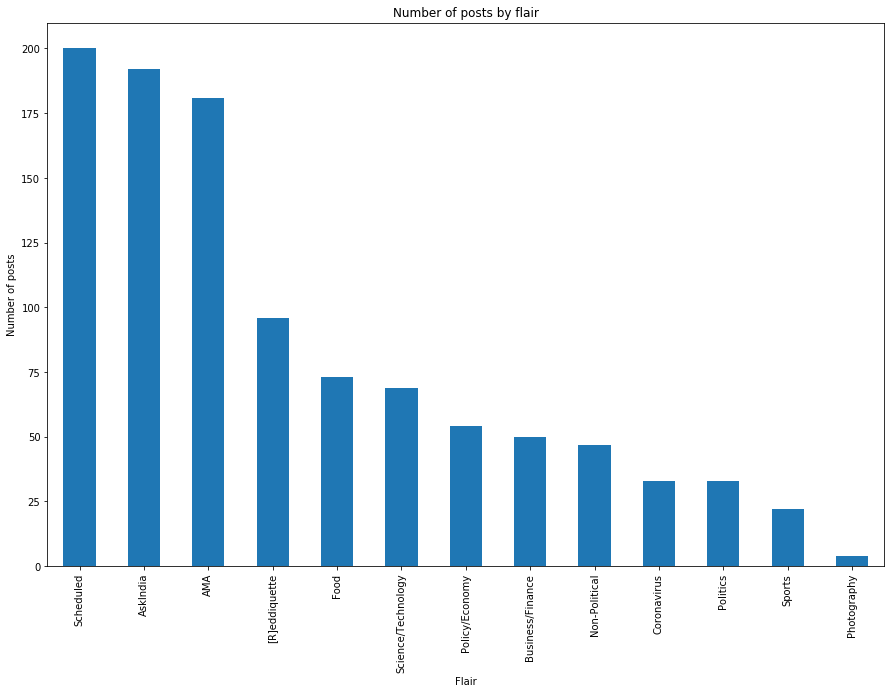

In [12]:
#plotting Number of posts by flair
post_dropNull.flair.value_counts().nlargest(100).plot(kind='bar', figsize=(15,10))
plt.title('Number of posts by flair')
plt.ylabel('Number of posts')
plt.xlabel('Flair');

## Visualising Correlation

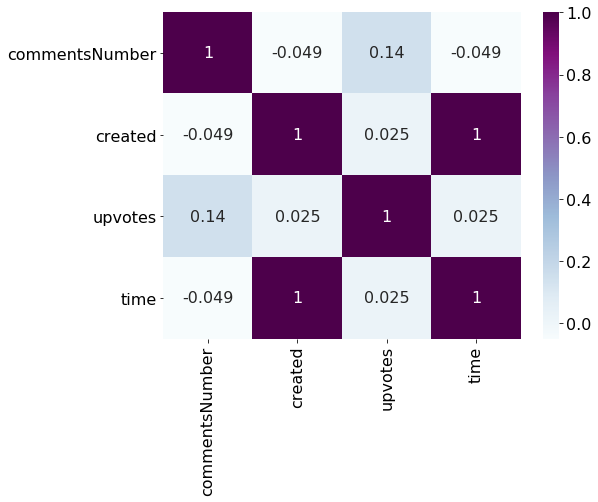

In [13]:
#making a heat map to visualise the correlation in data
plt.figure(figsize=(8,6))
plt.rc('font',size=16)
sb.heatmap(posts.corr(),cmap="BuPu",annot=True)

## Plotting the distribution of comments among flairs

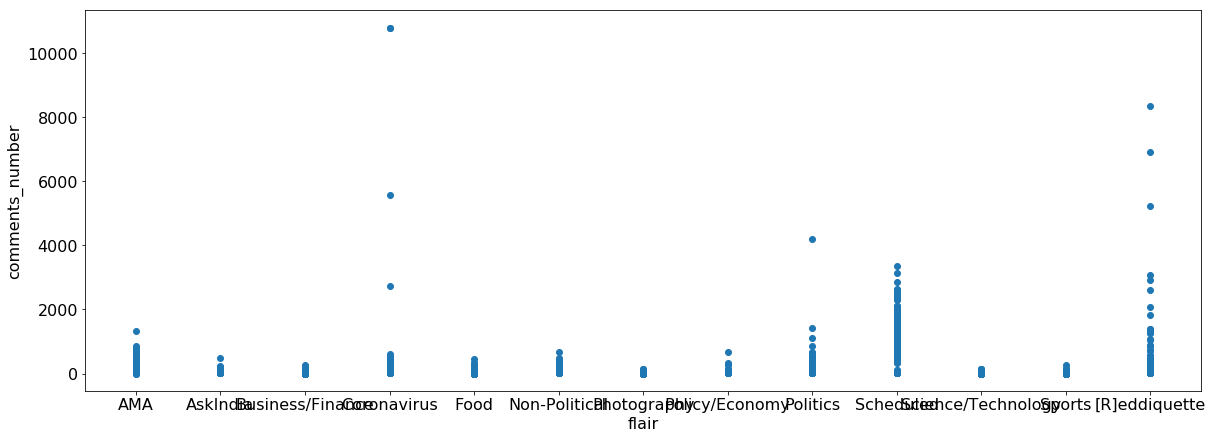

In [14]:
#plotting the number of comments for each post flair-wise
fig, ax = plt.subplots(figsize=(20,7))
plt.rc('font',size=8)
ax.scatter(posts['flair'], posts['commentsNumber'])
ax.set_xlabel('flair')
ax.set_ylabel('comments_number')
plt.show()

In [15]:
posts['title'].value_counts() # looking for duplicates in titles of the posts

Late Night Random Discussion Thread !                                                                     110
Thousands of litres of cow urine consumed in Gujarat daily                                                  3
Hey, Reddit India. We are the founding editors of The Wire & you can ASK US ANYTHING                        2
Fist Fight At Delhi Cricket Body Meet, Gautam Gambhir Wants It Dissolved                                    2
Palghar lynching: Maharashtra home minister shares list of those arrested, says ‘none are Muslims’          1
                                                                                                         ... 
Spotify and Warner Music reach a new deal - expected to bring their catalogue of music to Indian users      1
This Hyderabad-Based Professor Made Petrol From Plastic And Is Selling It For Rs 40 Per Litre               1
Indian Tricolour Projected onto Switzerland's Mighty Matterhorn to Send a Message of Hope                   1
Share Mark

In [16]:
posts['author'].value_counts() # looking for duplicates in authors of the posts

oxythebot             218
hipporama              31
sudden_dust            29
Neglectedsince1994     27
Stuge234               24
                     ... 
ulrikereinhard          1
dev_tomato              1
fatherofgodfather       1
fattyfoods              1
cheriche                1
Name: author, Length: 1486, dtype: int64

## Making a count vectoriser and then visualising the frequency of words

In [17]:
#fitting a count vectorizer to the posts data
!pip install sklearn
from sklearn.feature_extraction.text import CountVectorizer
def top_10_elements(s):
    cv=CountVectorizer().fit(s)
    cv_fit=cv.fit_transform(s)
    W = cv.get_feature_names();    
    C = cv_fit.toarray().sum(axis=0)
    top_words=[[W[i],C[i]] for i in range(len(C))]
    return sorted(top_words, key = lambda x:x[1])[-10:][::-1]
print(top_10_elements((posts.title.astype("str")+" "+posts.body.astype("str")+" "+posts.comments.astype("str"))))

[['the', 41425], ['to', 30759], ['and', 25715], ['of', 21701], ['in', 19187], ['is', 18004], ['you', 15484], ['it', 13748], ['for', 12532], ['that', 11183]]


[['the', 41425], ['to', 30759], ['and', 25715], ['of', 21701], ['in', 19187], ['is', 18004], ['you', 15484], ['it', 13748], ['for', 12532], ['that', 11183]]


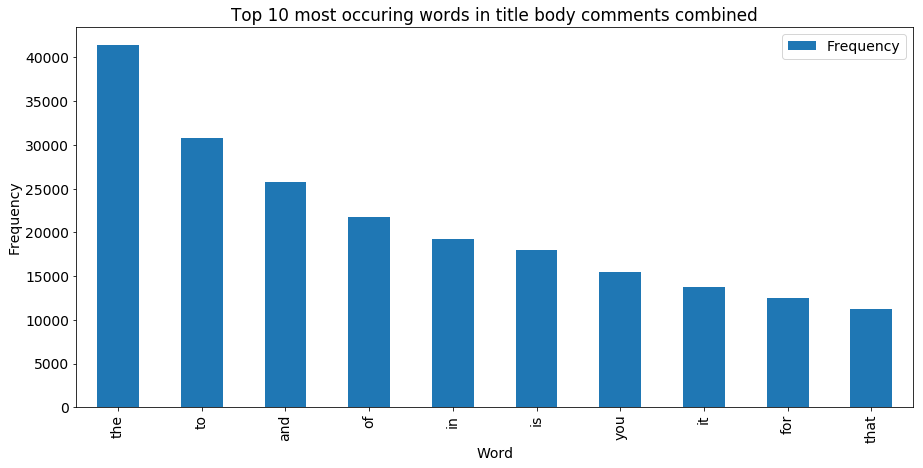

In [18]:
#plotting the top 10 words which occur the most
top10Words_title_body_comments=top_10_elements(posts.body.apply(mkstring)+" "+posts.comments.apply(mkstring)+" "+(posts.title.apply(mkstring)))
print(top10Words_title_body_comments)
plt.rc('font',size=14)
topDf=pd.DataFrame(top10Words_title_body_comments,columns=["Word","Frequency"])
topDf.plot(x="Word",y="Frequency",kind='bar', figsize=(15,7))
plt.title('Top 10 most occuring words in title body comments combined')
plt.ylabel('Frequency')
plt.xlabel('Word');

## Cleaning the data

In [19]:
#import re and nltk for data cleaning
import re
import nltk
#downloading stop words to remove them later from the data
nltk.download("stopwords")
from nltk.corpus import stopwords
def cleanData(s):
    s=str(s).lower()
    #removing punctuations, hrefs, numbers, symbols and stop words from the data
    s=re.compile(r'https?:\/\/\S+').sub(' ',s)
    s=re.compile(r'[0-9@#$&%\n\*()!\+-]').sub(' ',s)
    s=re.compile(r'[\/.,\[\];{}|:"<>\?!]').sub(' ',s)
    stopwordsSet=set(stopwords.words('english'))
    temp=""
    for i in s.split(' '):
        if i not in stopwordsSet:
            temp=temp+i+" "
    s=temp
    return s

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Visualising the frequency of words after cleaning the data

[['people', 4764], ['like', 4312], ['india', 4285], ['one', 3052], ['get', 2827], ['time', 2425], ['would', 2417], ['even', 2338], ['also', 2259], ['good', 2217]]


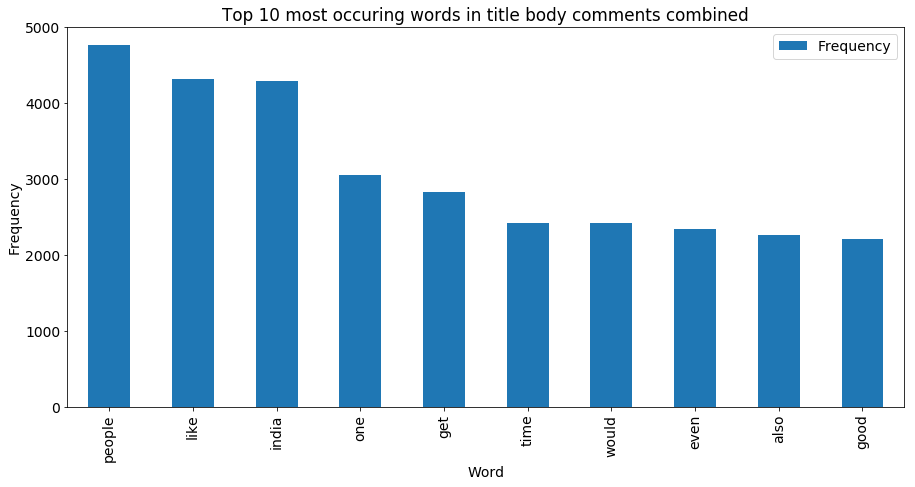

In [20]:
#plotting the top 10 words which occur the most in the cleaned data
posts['body'] = posts['body'].apply(cleanData)
posts['comments'] = posts['comments'].apply(cleanData)
posts['title'] = posts['title'].apply(cleanData)
cleaned_top10Words_title_body_comments=top_10_elements(posts.body.astype("str")+" "+posts.comments.astype("str")+" "+posts.title.astype("str"))
print(cleaned_top10Words_title_body_comments)
plt.rc('font',size=14)
topDf=pd.DataFrame(cleaned_top10Words_title_body_comments,columns=["Word","Frequency"])
topDf.plot(x="Word",y="Frequency",kind='bar', figsize=(15,7))
plt.title('Top 10 most occuring words in title body comments combined')
plt.ylabel('Frequency')
plt.xlabel('Word');

In [21]:
posts.head() #seeing the glimpse of data after cleaning

,author,body,comments,commentsNumber,created,flair,upvotes,submission,time,title,url
0,frthnker,continue ama tomorrow around pm ist hel...,one join team full time part time type roles...,308,1.578083e+09,AMA,1069,ejes3k,1.578055e+09,hi reddit pratik sinha co founder alt news ...,https://www.reddit.com/r/india/comments/ejes3k...
1,pythoroshan,nan,please remember top level comments reserved q...,411,1.584484e+09,AMA,819,fk649f,1.584455e+09,hi i’m dr roshan radhakrishnan doctor avid...,https://i.redd.it/vf1ak8axs8n41.jpg
2,pankajpushkar,hello reddit i'm pankaj pushkar represent t...,verified note unplanned ama took time us ...,431,1.575239e+09,AMA,1567,e4i3vq,1.575211e+09,aam aadmi party mla ask anything,https://www.reddit.com/r/india/comments/e4i3vq...
3,aatishtaseer,taking break shower hair cut check back lat...,hi aatish mother endorsed rss modi entire c...,147,1.577491e+09,AMA,260,egctcf,1.577462e+09,hi reddit i'm aatish taseer ask anything,https://www.reddit.com/r/india/comments/egctcf...
4,Vaitheek,hi reddit name k vaitheeswaran e commerc...,ama verified announcement post update...,44,1.579982e+09,AMA,57,etpyiu,1.579954e+09,ama k vaitheeswaran jan th,https://www.reddit.com/r/india/comments/etpyiu...


In [22]:
posts.describe

<bound method NDFrame.describe of                 author                                               body  \
0             frthnker   continue ama tomorrow  around    pm ist   hel...   
1          pythoroshan                                               nan    
2        pankajpushkar  hello reddit   i'm pankaj pushkar  represent t...   
3         aatishtaseer    taking break shower hair cut  check back lat...   
4             Vaitheek  hi reddit  name   k vaitheeswaran    e commerc...   
...                ...                                                ...   
2595     Ajaatshatru34                                               nan    
2596        SquareCrab                                               nan    
2597  ThrowaWayIdkIffy  new motor vehicles act proposes fines worth  k...   
2598          neoronin                                               nan    
2599         fakebaby3                                               nan    

                                         

In [23]:
# List of the flairs that occur frequently
flairsList = ['AMA', 'AskIndia', 'Business/Finance', 'Coronavirus', 'Food', 'Non-Political', 'Photography', 'Policy/Economy', 'Politics', 'Scheduled', 'Science/Technology', 'Sports', '[R]eddiquette']


In [24]:
# Creating a top 10 word frequency graph
def make_top10_graph(data, flair):
    data=top_10_elements(data)
    print('\n\n',flair,'\n',data)
    plt.rc('font',size=8)
    topDf=pd.DataFrame(data,columns=["Word","Frequency"])
    topDf.plot(x="Word",y="Frequency",kind='bar', figsize=(10,5))
    plt.title('Top 10 most occuring words in title body comments combined for Flair: '+flair)
    plt.ylabel('Frequency')
    plt.xlabel('Word');



 AMA 
 [['india', 918], ['like', 833], ['people', 620], ['think', 614], ['ama', 587], ['would', 563], ['questions', 545], ['one', 526], ['also', 444], ['hi', 432]]


 AskIndia 
 [['get', 565], ['like', 548], ['people', 523], ['india', 368], ['also', 360], ['good', 353], ['would', 338], ['one', 320], ['even', 319], ['time', 305]]


 Business/Finance 
 [['india', 181], ['money', 174], ['nan', 166], ['like', 153], ['people', 142], ['bank', 139], ['get', 123], ['time', 115], ['pay', 107], ['one', 107]]


 Coronavirus 
 [['people', 836], ['india', 428], ['like', 355], ['even', 313], ['government', 276], ['one', 266], ['lockdown', 246], ['get', 216], ['covid', 216], ['time', 215]]


 Food 
 [['food', 225], ['like', 204], ['indian', 166], ['india', 162], ['one', 146], ['get', 143], ['nan', 136], ['people', 133], ['good', 126], ['chicken', 120]]


 Non-Political 
 [['people', 521], ['like', 400], ['india', 308], ['one', 280], ['get', 230], ['even', 193], ['would', 184], ['good', 183], ['time

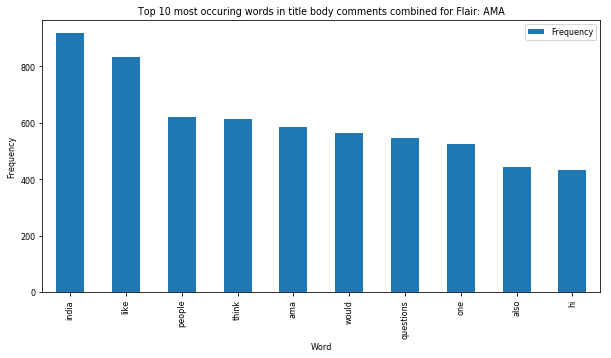

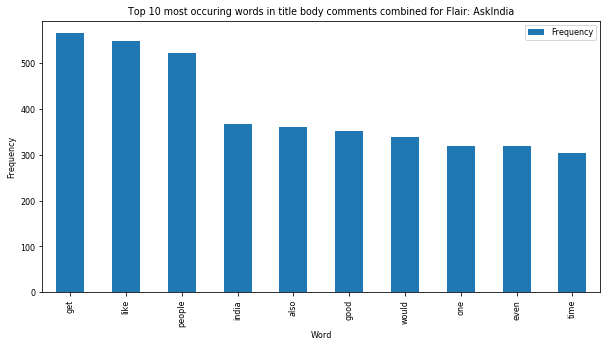

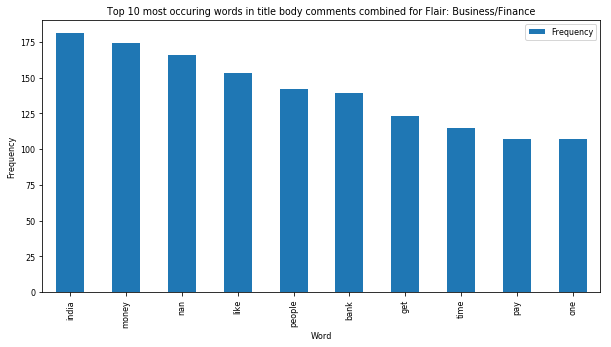

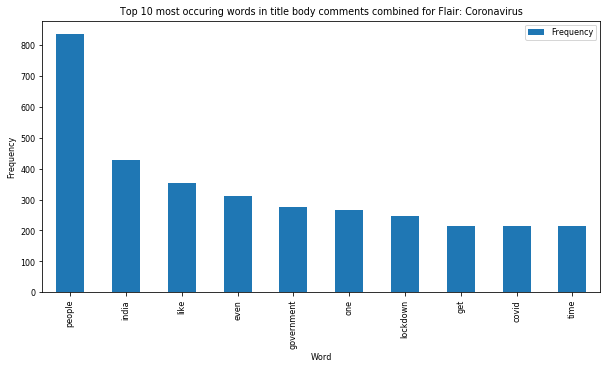

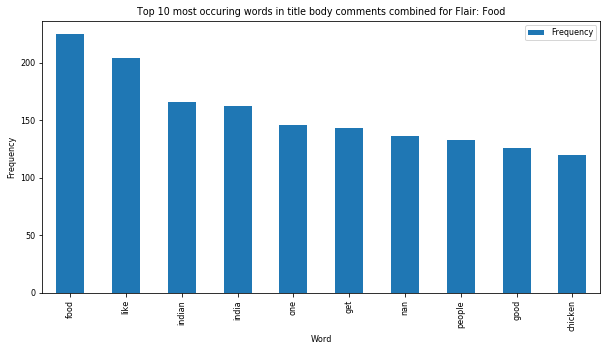

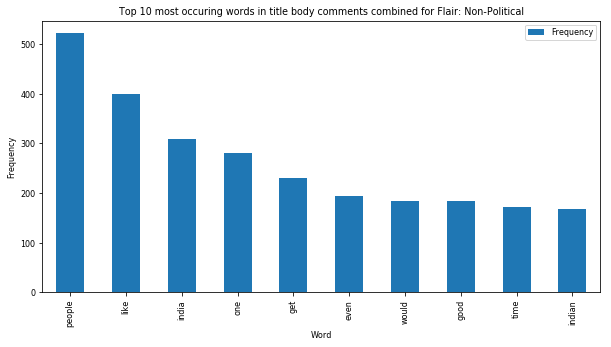

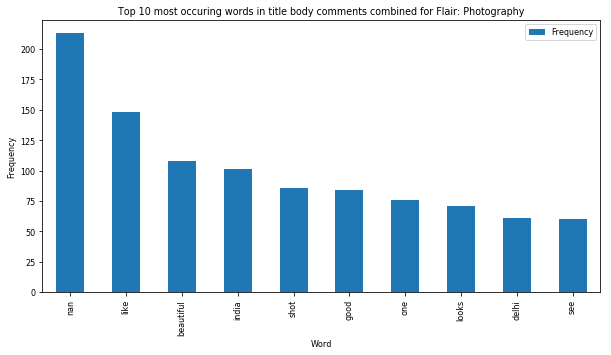

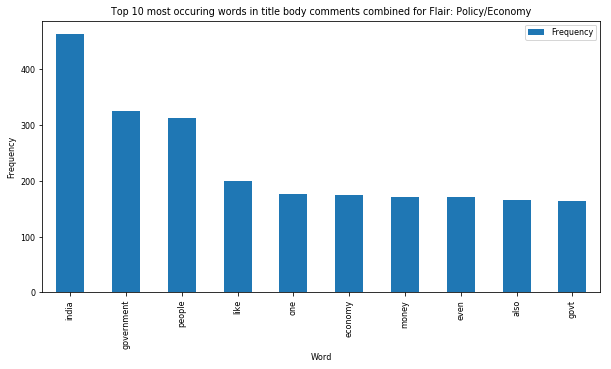

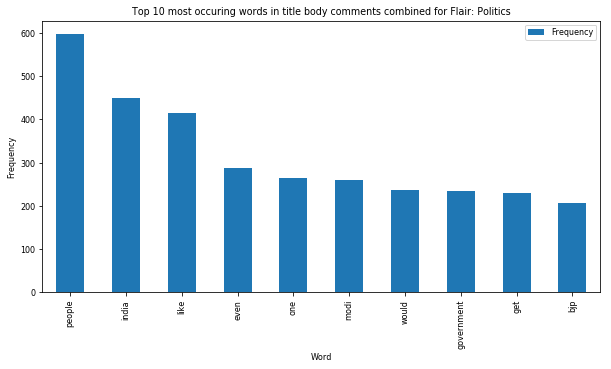

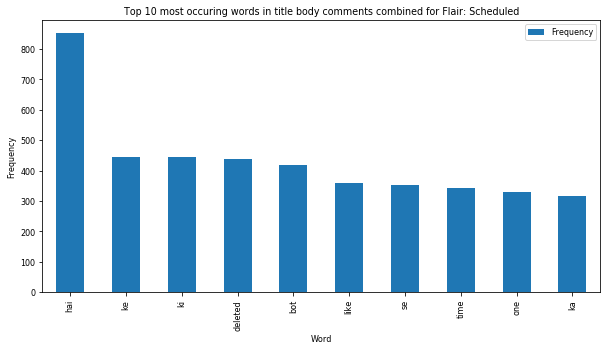

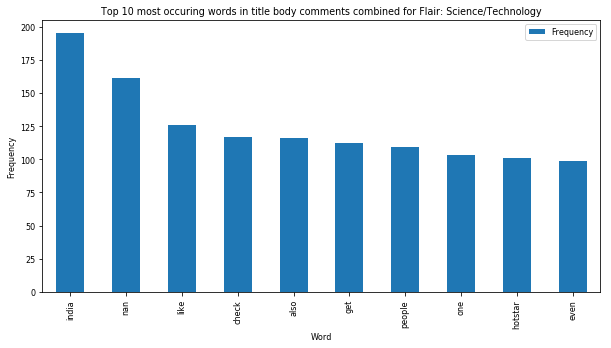

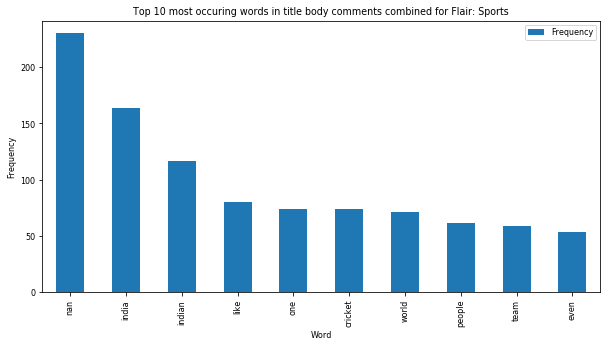

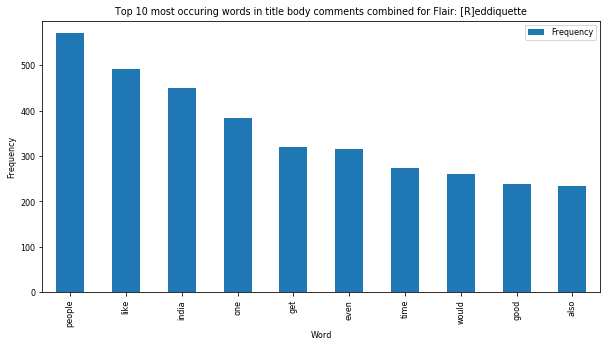

In [25]:
# making top 10 word frequency graphs for each flair
for i in range(len(flairsList)):
    make_top10_graph(posts.body.astype("str")[200*i:200*(i+1)]+" "+posts.comments.astype("str")[200*i:200*(i+1)]+" "+posts.title.astype("str")[200*i:200*(i+1)], flairsList[i])


## Saving the cleaned data in a csv

In [26]:
posts.to_csv('../Data/cleaned_scrapedData.csv', index=False) # Saving the cleaned data in a csv